### Missing Value Analysis

In [432]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline
import numpy as np

In [149]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [150]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [151]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d imsparsh/jobathon-analytics-vidhya

In [ ]:
!ls

In [ ]:
!unzip \*.zip  && rm *.zip

In [291]:
train=pd.read_csv('/content/gdrive/MyDrive/Kaggle/train.csv')
test=pd.read_csv('/content/gdrive/MyDrive/Kaggle/test.csv')

#### Let's view column-wise missing value counts

In [154]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

#### Nullity Matrix - missing value pattern

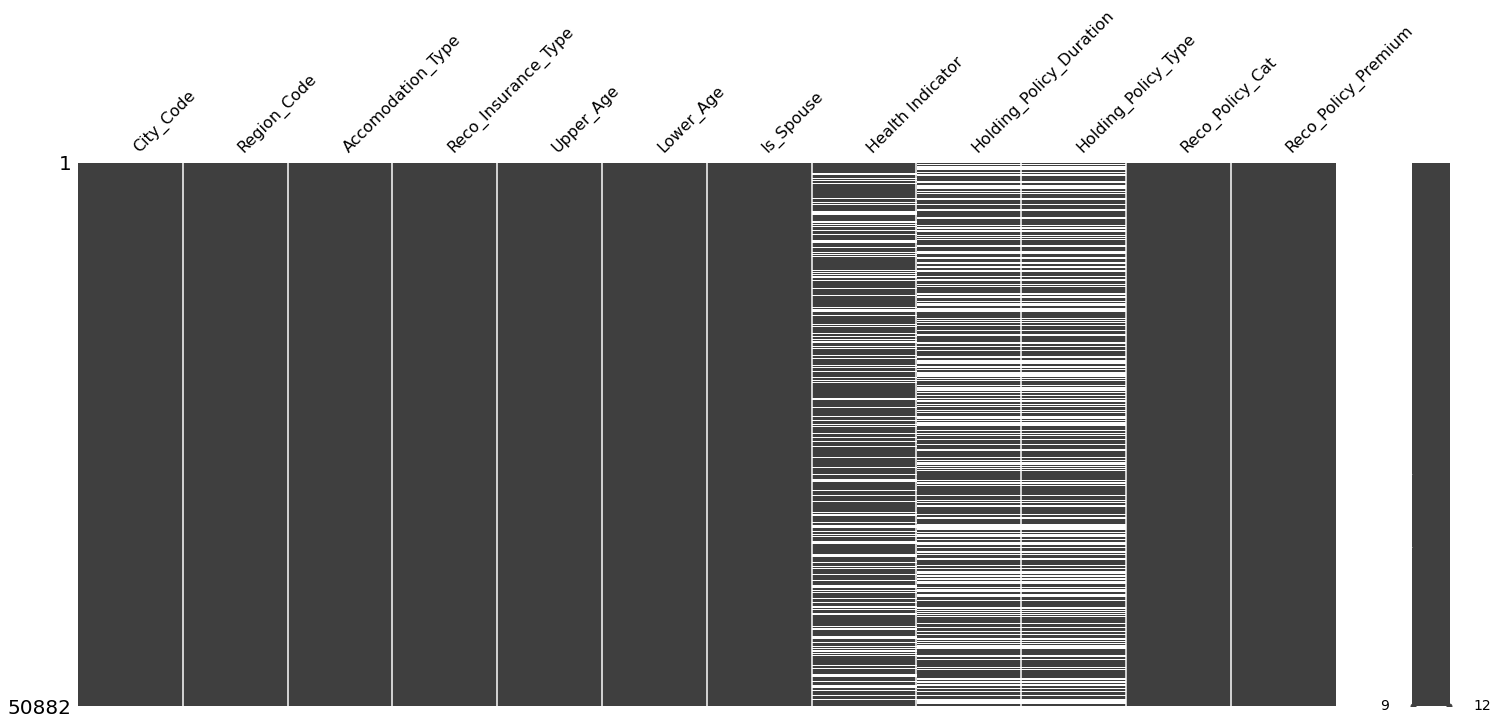

In [155]:
msno.matrix(train.iloc[:,1:13])

#### Missing value by column

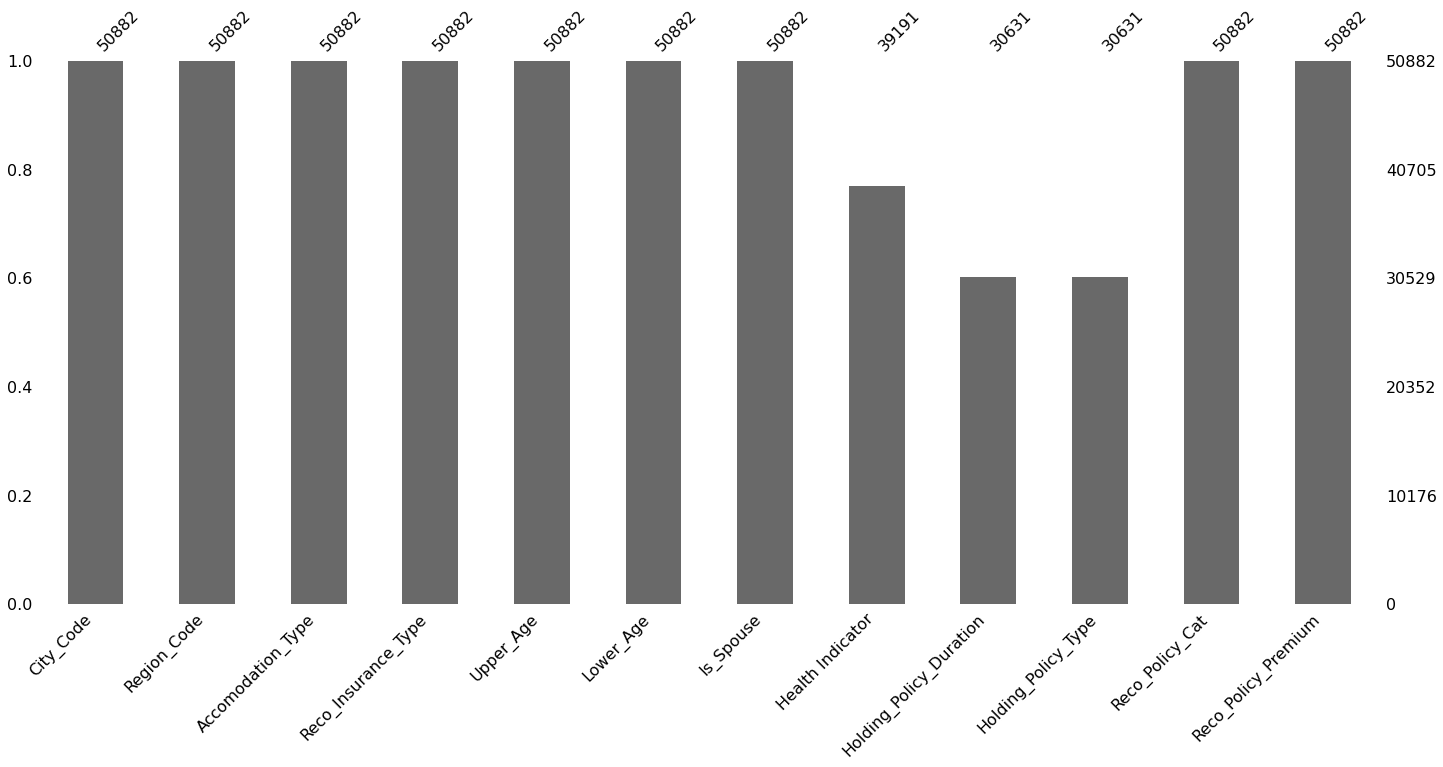

In [156]:
msno.bar(train.iloc[:,1:13])

#### Pair-Wise nullity correlation analysis

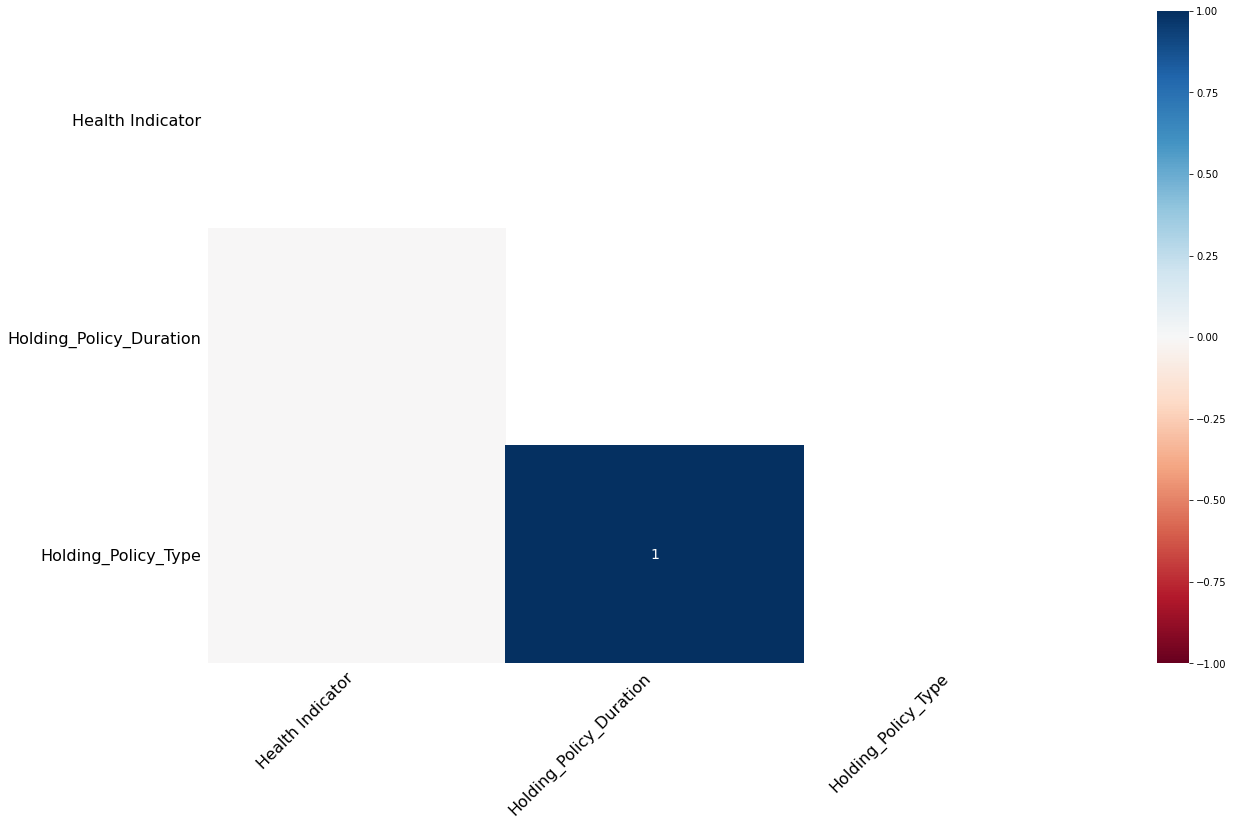

In [157]:
msno.heatmap(train.iloc[:,1:13])

#### The above heatmap explains that both holding policy type and holding policy duration variables have 1 nullity correlation, that is if one variable appears the other definitely also does.

#### Dendrogram-reveals deeper trend than pair-wise analysis heatmap

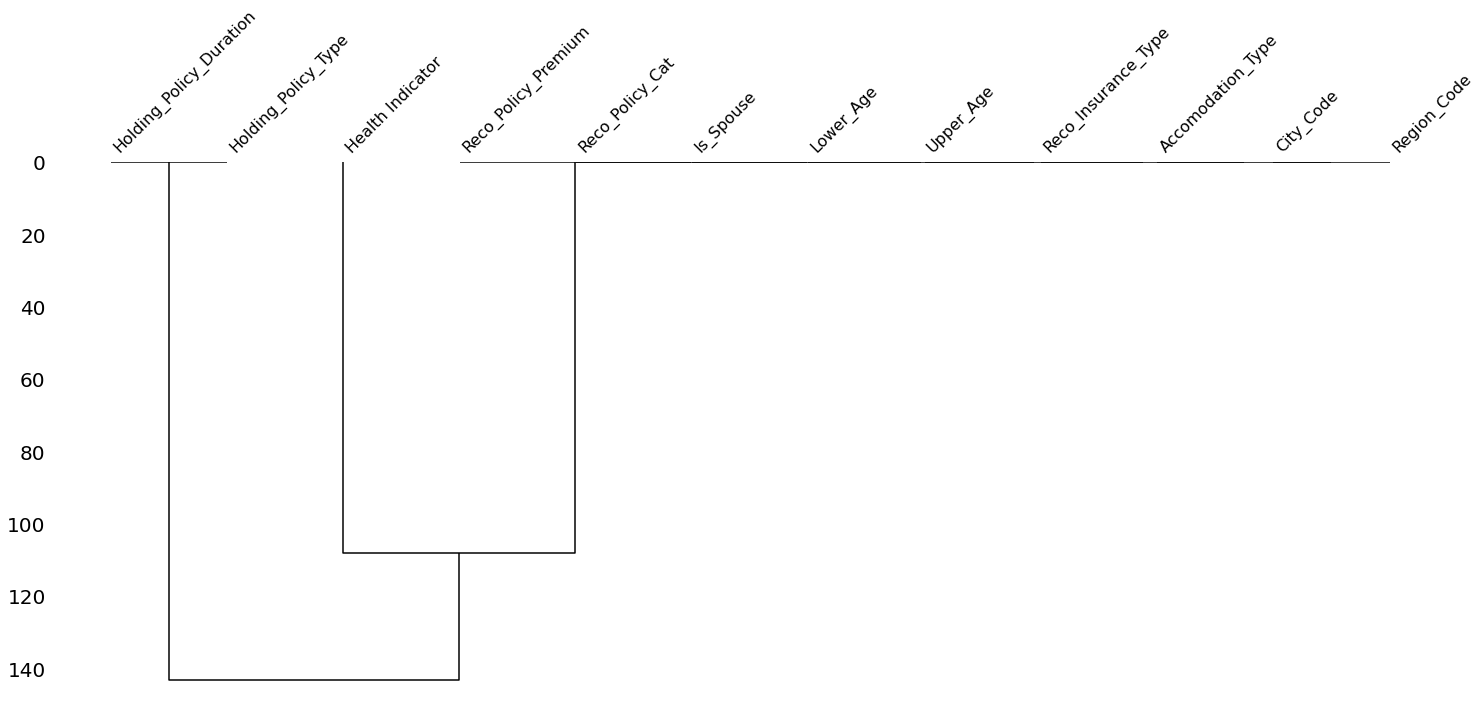

In [158]:
 msno.dendrogram(train.iloc[:,1:13])

#### The above dendrogram explains that the horizontal line(top) is zero binary distance. Predicts one variable another variable's presence. if the height of the cluster is large then there is a mismatch between the variable records.


### Test Dataset

#### Test dataset column-wise missing value count.

In [159]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

#### Dendrogram

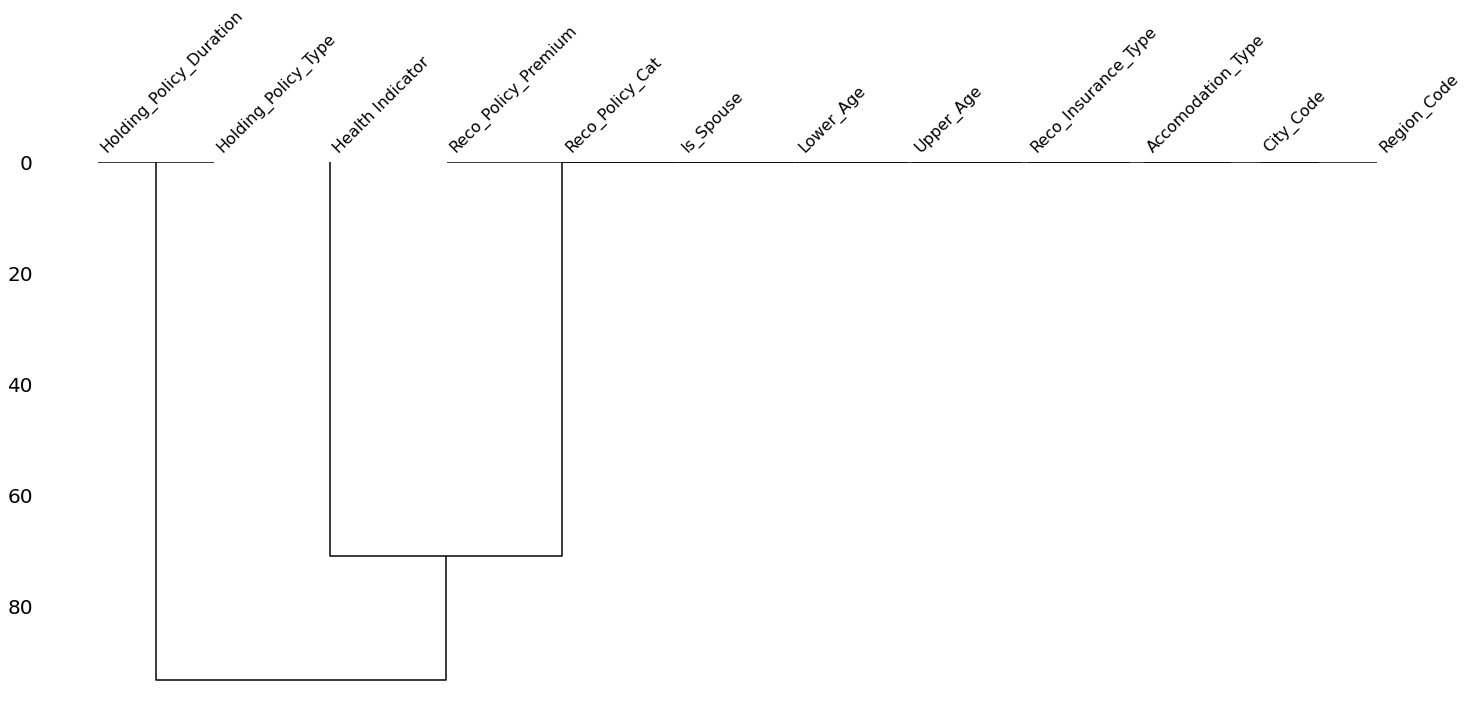

In [160]:
 msno.dendrogram(test.iloc[:,1:13])

#### The above dendrogram shows that the test dataset also follows the same missing pattern as train data.

### Missing Value Imputation

#### For the missing value imputation the category vairables should be encoded as numbers.

In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [130]:
train.select_dtypes(include='object')

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
0,C3,Rented,Individual,No,X1,14+
1,C5,Owned,Joint,No,X2,NaN
2,C5,Owned,Individual,No,NaN,1.0
3,C24,Owned,Joint,No,X1,14+
4,C8,Rented,Individual,No,X2,3.0
...,...,...,...,...,...,...
50877,C4,Rented,Individual,No,X3,NaN
50878,C5,Rented,Individual,No,X3,7.0
50879,C1,Rented,Individual,No,X2,14+
50880,C1,Owned,Joint,No,X2,2.0


#### Before imputing missing values, a separate missing value indicator to be created for the column that has missing values. 

In [271]:
train.select_dtypes(include='object').columns.values

array(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration'],
      dtype=object)

In [292]:
train['HI_miss']=train['Health Indicator'].isnull().astype(int)

In [293]:
train['Hpd_miss']=train['Holding_Policy_Duration'].isnull().astype(int)

In [294]:
train['Hpt_miss']=train['Holding_Policy_Type'].isnull().astype(int)

#### Let's re-arrange the column

In [295]:
train=train.iloc[:,np.r_[0:9,14,9,15,10,16,11:14]]
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,HI_miss,Holding_Policy_Duration,Hpd_miss,Holding_Policy_Type,Hpt_miss,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,0,14+,0,3.0,0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,NaN,1,NaN,1,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,0,1.0,0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,0,14+,0,3.0,0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,0,3.0,0,1.0,0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,0,NaN,1,NaN,1,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,0,7.0,0,3.0,0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,0,14+,0,1.0,0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,0,2.0,0,2.0,0,16,28179.2,1


#### City code column has mixed type values(character and number) so we remove those character and make is as nummerical column.

In [296]:
train['City_Code']=train['City_Code'].str.replace(r'\D', '').astype(int)

#### Accomodation Type category column has two levels rented and owned.Let's encode **owned as 1 and rented as 0**

In [297]:
acc_encode={'Owned':1,'Rented':0} 

In [298]:
train['Accomodation_Type']=train['Accomodation_Type'].map(acc_encode)

#### Reco Insurance Type category column has two levels individual and joint .Let's encode **joined as 0 and individual as 1**

In [299]:
rectype_encode={'Individual':1,'Joint':0} 

In [300]:
train['Reco_Insurance_Type']=train['Reco_Insurance_Type'].map(rectype_encode)

#### Is Spouse category column has two levels yes and no .Let's encode **no as 0 and yes as 1**

In [301]:
spouse_encode={'Yes':1,'No':0} 

In [302]:
train['Is_Spouse']=train['Is_Spouse'].map(spouse_encode)

#### Health Indicator column has mixed type values(character and number) so we remove those character and make is as nummerical column.

In [262]:
import re

In [304]:
train['Health Indicator']=train['Health Indicator'].str.replace(r'\D','').astype('int32',errors='ignore')

#### Holding Policy Duration has mixed type values(addition operator symbol and number) so we remove those operator symbol and make is as nummerical column.

In [305]:
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].replace('14+','15.0').astype('object')

In [308]:
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].str.replace(r'\D0','')

#### Let's impute missing value using Knn algorithm

In [174]:
from sklearn.impute import KNNImputer

In [318]:
imputer=KNNImputer(n_neighbors=2)

In [317]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,HI_miss,Holding_Policy_Duration,Hpd_miss,Holding_Policy_Type,Hpt_miss,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3,3213,0,1,36,36,0,1,0,15,0,3.0,0,22,11628.0,0
1,2,5,1117,1,0,75,22,0,2,0,NaN,1,NaN,1,22,30510.0,0
2,3,5,3732,1,1,32,32,0,NaN,1,1,0,1.0,0,19,7450.0,1
3,4,24,4378,1,0,52,48,0,1,0,15,0,3.0,0,19,17780.0,0
4,5,8,2190,0,1,44,44,0,2,0,3,0,1.0,0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,4,845,0,1,22,22,0,3,0,NaN,1,NaN,1,18,7704.0,0
50878,50879,5,4188,0,1,27,27,0,3,0,7,0,3.0,0,4,5408.0,0
50879,50880,1,442,0,1,63,63,0,2,0,15,0,1.0,0,12,11374.0,0
50880,50881,1,4,1,0,71,49,0,2,0,2,0,2.0,0,16,28179.2,1


In [319]:
X_imputed = imputer.fit_transform(train.iloc[:,np.r_[8,10,12]])

#### Imputed array

In [320]:
X_imputed=pd.DataFrame(X_imputed,columns=train.iloc[:,np.r_[8,10,12]].columns)

In [330]:
X_imputed

,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type
0,1.0,15.0,3.0
1,2.0,4.0,1.0
2,1.5,1.0,1.0
3,1.0,15.0,3.0
4,2.0,3.0,1.0
...,...,...,...
50877,3.0,2.5,3.0
50878,3.0,7.0,3.0
50879,2.0,15.0,1.0
50880,2.0,2.0,2.0


#### Write imputed Health Indicator value to the train dataset column.

In [331]:
train['Health Indicator']=X_imputed['Health Indicator'].astype('int').round()

#### Write imputed Holding Policy Duration value to the train dataset column.

In [334]:
train['Holding_Policy_Duration']=X_imputed['Holding_Policy_Duration'].astype('int').round()

#### Write imputed Holding Policy value Type to the train dataset column.

In [335]:
train['Holding_Policy_Type']=X_imputed['Holding_Policy_Type'].astype('int').round()

In [338]:
y = train['Response']
x = train.iloc[:,np.r_[1:16]]


#### Split data into train and test

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [343]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.99,random_state=1236)

#### Simple random forest model

In [370]:
# importing random forest classifier from assemble module 
from sklearn.ensemble import RandomForestClassifier 

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 500)   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(xtrain,ytrain) 
  
# performing predictions on the test dataset 
y_pred = clf.predict(xtest) 
  
# metrics are used to find accuracy or error 
from sklearn import metrics   
print() 
  
# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.roc_auc_score(ytest, y_pred)) 


ACCURACY OF THE MODEL:  0.5060761603930859


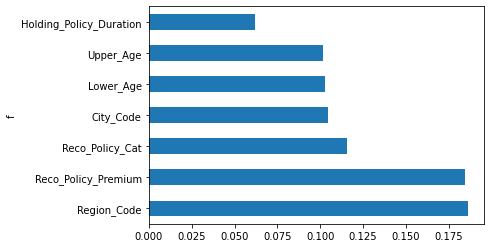

In [443]:
pd.Series(clf.feature_importances_,index=xtrain.columns).nlargest(7).plot(kind='barh')

#### The accuaracy of the model is 0.50

#### Let's try xgboost model with random search

In [345]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.4,eval_metric='auc')
model.fit(xtrain, ytrain)
model.score(xtest,ytest)


0.7721021611001965

In [347]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [349]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [357]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(xtrain,ytrain), verbose=3, random_state=1001 )

random_search.fit(xtrain, ytrain)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  3.3min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f3f6fad5ed0>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=600,
                                           n_jobs=1, nthread=1,
                                           objective='binary:logist...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=True, subsample=1,
                                           verbosity=1),
                   iid='deprec

In [445]:
print(random_search.best_score_)

0.6570303307672747


In [450]:
print("The best parameters\n"+"_"*100+"\n\n",random_search.best_params_)

The best parameters
____________________________________________________________________________________________________

 {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 0.8}


In [437]:
feat_import=pd.Series(random_search.best_estimator_.feature_importances_,index=xtrain.columns)

#### Feature Importance Plot

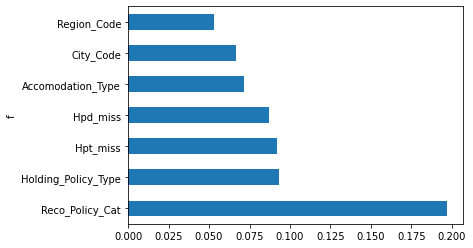

In [444]:
feat_import.nlargest(7).plot(kind='barh')

In [367]:
pred = random_search.predict_proba(xtest)[:,1]

#### ROC Plot

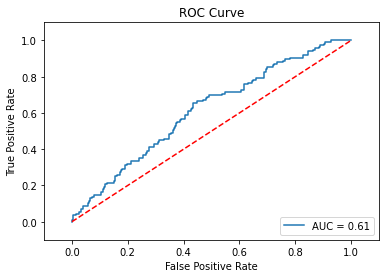

In [368]:
fpr, tpr, _ = metrics.roc_curve(ytest, pred)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

#### The accuracy of random search xgboost is 0.61